1. Read and Clean the Dataset

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('homes-91325.csv')

df.sample(10)

In [49]:
df.sample(5)

,price,br,bath,sf,lot
2,"$899,900.00",4,3.00,2319,16552
23,"$2,290,000.00",5,5.50,6250,21780
14,"$999,999.00",4,2.50,2558,19602
5,"$679,950.00",3,1.75,1650,6155
12,"$849,000.00",4,3.50,3202,5861


In [3]:
df.shape

(24, 5)

**  Drop unnescessary columns, transfom the remaining column name to lower cases **

In [4]:
# testing purpose only need 'lOT' column

# df.drop(columns=['LOT'], inplace=True)

# creates lowerc case names
df.columns = [name.lower() for name in df.columns]

In [6]:
df.head(5)

,price,br,bath,sf,lot
0,"$599,950.00",3,1.0,1540,5989
1,"$690,000.00",3,3.0,2332,9262
2,"$899,900.00",4,3.0,2319,16552
3,"$749,900.00",3,2.0,2952,10890
4,"$1,299,900.00",5,4.0,4003,12632


In [11]:
# get type info within columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   24 non-null     object 
 1   br      24 non-null     int64  
 2   bath    24 non-null     float64
 3   sf      24 non-null     int64  
 4   lot     24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


##  2 version - convert price to float



In [40]:
Y=[float(p.strip("$").replace(",","")) for p in df["price"]]
print(Y)

#df['price'] = df['price'].astype('float')

[599950.0, 690000.0, 899900.0, 749900.0, 1299900.0, 679950.0, 1000000.0, 899000.0, 1500000.0, 1298500.0, 899900.0, 1069000.0, 849000.0, 1299000.0, 999999.0, 1295000.0, 949000.0, 575000.0, 1050000.0, 1349000.0, 860000.0, 1999999.0, 690000.0, 2290000.0]


In [54]:

#price = [float(p.strip("$").replace(",","")) for p in float(df.price)]

price = df['price'].tolist()

price


['$599,950.00',
 '$690,000.00',
 '$899,900.00',
 '$749,900.00',
 '$1,299,900.00',
 '$679,950.00',
 '$1,000,000.00',
 '$899,000.00',
 '$1,500,000.00',
 '$1,298,500.00',
 '$899,900.00',
 '$1,069,000.00',
 '$849,000.00',
 '$1,299,000.00',
 '$999,999.00',
 '$1,295,000.00',
 '$949,000.00',
 '$575,000.00',
 '$1,050,000.00',
 '$1,349,000.00',
 '$860,000.00',
 '$1,999,999.00',
 '$690,000.00',
 '$2,290,000.00']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   24 non-null     object 
 1   br      24 non-null     int64  
 2   bath    24 non-null     float64
 3   sf      24 non-null     int64  
 4   lot     24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [57]:
df.describe()

,br,bath,sf,lot
count,24.000000,24.000000,24.000000,24.000000
mean,3.833333,3.281250,2935.125000,12898.208333
std,0.816497,1.815262,1264.647306,5451.883567
min,2.000000,1.000000,1002.000000,5861.000000
25%,3.000000,2.500000,2184.500000,8395.000000
50%,4.000000,3.000000,2662.500000,12632.000000
75%,4.000000,3.500000,3393.750000,16661.750000
max,6.000000,10.500000,6250.000000,24364.000000


In [15]:
# prepare x axis and check


XDF = df[['sf','lot']]
XDF[:5]
X = np.array(XDF)
X[:5]

array([[ 1540,  5989],
       [ 2332,  9262],
       [ 2319, 16552],
       [ 2952, 10890],
       [ 4003, 12632]], dtype=int64)

In [16]:
# prepare y axis 
# needs to be an array

Y = np.array(
    [float(u[1:].replace(",","")) 
     for u in df["price"]])

In [17]:
Y

array([ 599950.,  690000.,  899900.,  749900., 1299900.,  679950.,
       1000000.,  899000., 1500000., 1298500.,  899900., 1069000.,
        849000., 1299000.,  999999., 1295000.,  949000.,  575000.,
       1050000., 1349000.,  860000., 1999999.,  690000., 2290000.])

# Linear Regression (LR)

Find Price determined by lot size and square footage

In [18]:

from sklearn.linear_model import LinearRegression
# polyfit & linregress only allow one x variable
# we have 2 x variables
# x1 = square feet
# x2 = lot size
# y(price) = a + b0 * x1 + b1 * x2

In [23]:
# initialize Linear Regression
LR = LinearRegression()

In [24]:
# prepare Y for Linear Regression (LR)
# LR expects Y to be a column vector

# LR expects Y to be a column vector
Y = Y.reshape(-1,1) # -1 (gimme whatever rows); 1 means: 1 column
Y[:5]

array([[ 599950.],
       [ 690000.],
       [ 899900.],
       [ 749900.],
       [1299900.]])

In [25]:
# create LR model

model = LR.fit(X,Y)

In [26]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [28]:
# find slope

model.coef_[0]

array([251.21558221,  20.10762278])

In [30]:
# find intercept

model.intercept_[0]

77965.139910775

In [31]:
# interpretation

slopes = model.coef_[0]
intercept = model.intercept_[0]

In [32]:
print(
    'Price= ', round(intercept,2), '+',
    round(slopes[0],2), '* SF +',
    round(slopes[1],2), '* LOT')

Price=  77965.14 + 251.22 * SF + 20.11 * LOT


In [38]:
df.describe()

,br,bath,sf,lot
count,24.000000,24.000000,24.000000,24.000000
mean,3.833333,3.281250,2935.125000,12898.208333
std,0.816497,1.815262,1264.647306,5451.883567
min,2.000000,1.000000,1002.000000,5861.000000
25%,3.000000,2.500000,2184.500000,8395.000000
50%,4.000000,3.000000,2662.500000,12632.000000
75%,4.000000,3.500000,3393.750000,16661.750000
max,6.000000,10.500000,6250.000000,24364.000000


# caution: I used all the data

#we should do a train - test split!!
 and repeat everything we did yesterday to get
 an idea on the +/- variation on the slopes and intercept

## Equation for a normal distribution

In [36]:
# create function

def f(x, a, b, c):
    return(a*np.exp(((-(x-b)**2)/(2*c**2)))) # np.exp means calculate the expontial of all elements inn the input array

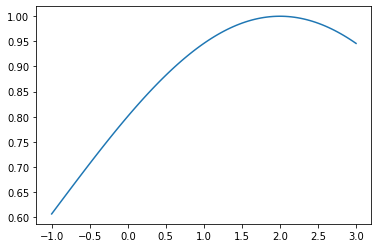

In [37]:
xstuff=np.linspace(-1,3,100)
ystuff=f(xstuff,1,2,3)
plt.plot(xstuff,ystuff)